# [AIFFEL_Exploration_09] Deep Learning Project

## 프로젝트 구성
세 개의 미니 프로젝트로 구성    
**1. Boston 주택 가격 예측 모델 만들기**     
**2. Reuters 딥러닝 모델 만들기**     
**3. CIFAR10 딥러닝 모델 만들기**

## 목차
*1. Boston 주택 가격 예측 모델 만들기*   
2. 결론    
**3. 탐구 및 시도 모음(프로젝트 진행 중 더 알아보고 시도해 부분들 모음)**           
4. Reuters 딥러닝 모델 만들기   
5. 결론     
**6. 탐구 및 시도 모음**    
7. CIFAR10 딥러닝 모델 만들기   
8. 결론     
**9. 탐구 및 시도 모음**     
10. 회고     
11. References    

## 글씨 색 표시
#### <span style = "color:orange;">- 노랑: 질문! or 짚고가자!</span>    
#### <span style = "color:red;">- 빨강: 중요 or 특이사항</span>

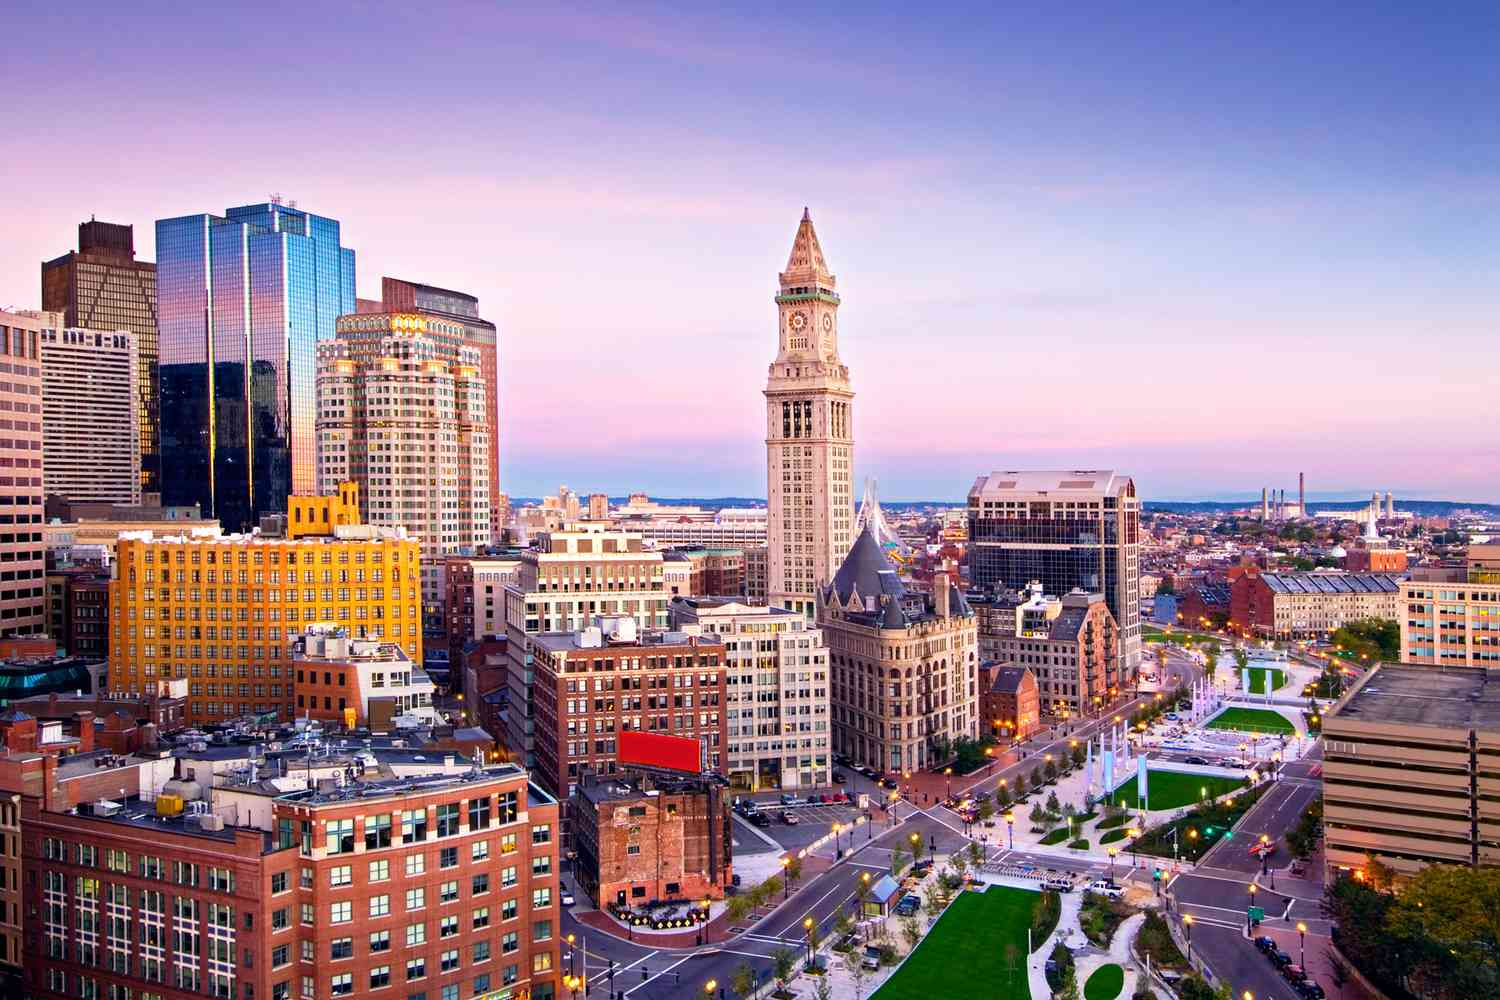

In [98]:
Image("[E-09] images/019.jpg")

# 1. Boston 주택 가격 예측 모델 
- Step 1. 라이브러리 및 데이터 불러오기
- Step 2. 데이터 구조 파악     
- Step 3. 데이터 전처리(표준화)     
- Step 4. 데이터 나누기
- Step 5. 모델 만들기 및 최적화(컴파일)     
- Step 6. 모델 학습 및 시각화    
- Step 7. 모델 평가 및 예측

### Step 1. 라이브러리 및 데이터 불러오기

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import models, layers, optimizers, utils 
!pip install IPython # 주피터에 이미지를 넣기 위해 패키지 설치 
from IPython.display import Image

In [10]:
# keras.datasets 안의 boston_housing 데이터셋 불러오기
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


데이터를 train용과 test용으로 나누어 줌

### Step 2. 데이터 구조 파악

In [48]:
# 데이터셋의 크기 확인

print(len(train_data))
print(len(train_labels))
print(len(test_data))
print(len(test_labels))

404
404
102
102


#### 데이터들의 shape 확인

In [49]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(404, 13)
(404,)
(102, 13)
(102,)


#### 데이터 타입은?

In [50]:
type(train_data)

numpy.ndarray

In [51]:
type(train_labels)

numpy.ndarray

#### 이 데이터들은 어떻게 생겼나?

In [52]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [53]:
train_labels

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [54]:
test_data

array([[1.80846e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.72500e+01, 2.90500e+01],
       [1.23290e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.94950e+02, 1.62100e+01],
       [5.49700e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.96900e+02, 9.74000e+00],
       ...,
       [1.83377e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.89610e+02, 1.92000e+00],
       [3.58090e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.91700e+02, 9.71000e+00],
       [2.92400e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.40160e+02, 9.81000e+00]])

In [55]:
test_labels

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

### <span style = "color:orange;">짚고 가자! 데이터셋의 크기를 확인할 때 len을 쓰는 이유</span>
**len 함수는**    
매개변수로 들어온 문자열의 길이를 반환한다.     
내부에 있는 문자의 개수(공백 포함)을 계산해서 변환해주는 함수


train_data의 데이터타입은 numpy.ndarray    
shape은 (404, 13)이다.     
len 함수를 통해 나오는 404는 shape의 행의 개수와 같다.      

**len 함수를 사용하는 것에 대해 100% 이해된 건 아니지만 데이터의 크기를 확인할 때 len()을 사용할 수 있음 확인**

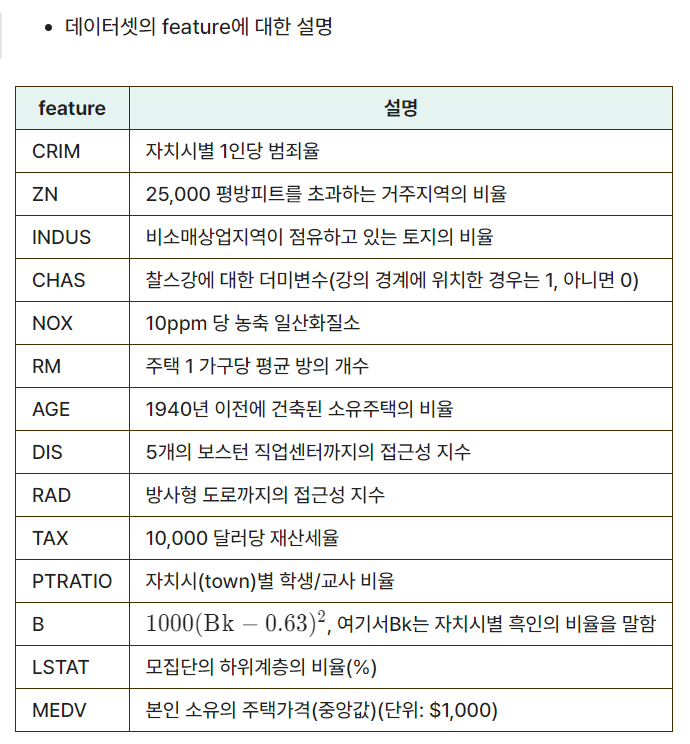

In [61]:
Image("[E-09] images/011.PNG")
# 노드의 데이터셋의 feature에 대한 설명 첨부

### <span style = "color:red;">데이터에 대한 구조 정리</span>
**shape은**     
(404, 13) (102, 13)     
(404, ) (102, )

**type은**     
numpy.ndarray

- train_data를 보니 13개의 특성이 하나의 행에 들어가있는 것을 알 수 있다.
- train_labels, test_labels은 하나의 열만 들어가 있다.
- 원래는 특성이 14개인데 집값에 대한 특성(feature)을 labels에 넣으니까 13개 열이 train_data에 들어간다.

### Step 3. 데이터 전처리(표준화)

In [57]:
# 노드에서는 아래와 같이 요구사항을 작성

# 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.

### <span style = "color:orange;">질문! 왜 표준화로 전처리를 하나?</span> 

#### 표준화란?
feature(column)간에 데이터의 범위가 다르면 모델의 파라미터를 업데이트하는 과정에서         
범위가 큰 feature(column)의 파라미터만 집중적으로 업데이트하는 문제가 생길 수 있다.      
<span style = "color:red;">**->모델을 제대로 학습시키기 어렵다.**</span>     
그래서 일반적으로 feature(column)간에 범위가 크게 다를 경우, 전처리 과정에서 데이터를 정규화한다.    

정규화를 하는 방법은 다양하지만, <span style = "color:red;">**가장 잘 알려진 방법은 표준화(Standardization)와 Min-Max Scaling이다.**</span>


#### 표준화(Standardization)     
표준화는데이터의 평균은 0, 분산은 1로 변환한다.     
Standardization은 보통 평균이 0이고 표준편차가 1일때 사용한다.    
그렇기에 피처가 가우시안 분포인 경우 유용하다.    

<span style = "color:red;">**z = (실제값x - x의 평균) / 표준편차**</span> 

[출처: LMS_Flipped School_4. 다양한 데이터 전처리 기법_4-5 정규화]

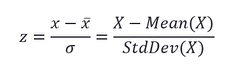

In [62]:
Image("[E-09] images/012.PNG")

### <span style = "color:red;">시도한 방법들</span> 
1. 13개 컬럼마다 평균을 다 구해서 실제값 x - x의 평균을 구해보자      
2. 사이킷럿의 표준화 방법을 사용해보면?      
3. 10번 딥러닝 프로젝트 노드에서 나온 전체의 평균을 구해 train_data에서 빼는 방법 사용해보기

### <span style = "color:red;">결론</span>      
**1. 13개 컬럼마다 평균을 다 구해서 실제값 x - x의 평균을 구해보자**       
ndarray의 데이터에서 각 컬럼별 평균을 구하는 것까지 성공       
각 데이터에서 평균을 빼는 것이 양이 너무 많고, 어떻게 해야할지 몰라 사이킷런을 생각해 봄      

**2. 사이킷럿의 표준화 방법을 사용해보면?**       
그래프까지 출력했는데 제대로 표준화가 된 건지 파악하기 어려움      

**3. 10번 딥러닝 프로젝트 노드에서 나온 전체의 평균을 구해 train_data에서 빼는 방법 사용해보기**      
진행은 되었으나 왜 이렇게 하는지에 대한 부분은 이해하지 못해 왜 그렇게 한 건지 알아봄     

#### <span style = "color:red;"> 3번의 방법을 먼저 소개</span> 
#### <span style = "color:red;"> 1, 2의 시도 과정은 아래 "탐구 및 시도 모음집"에서 확인 가능</span> 


### 전체의 평균을 구해 train_data에서 빼는 방법으로 정규화 진행

In [67]:
mean = train_data.mean(axis=0) # axis = 0은 행을 의미 
train_data = train_data - mean

### <span style = "color:orange;">질문! axis = 0이면.. 행마다 평균을 구하는 건가? 우리는 지금 열로 구해야하는 게 아닌가?</span> 

알고 있기로는 axis = 0은 행을 의미하는데, 지금은 열마다 평균을 구하는 건데, 왜 axis=0일까 하는 궁금증이 생겼다.    
찾아보니, 넘파이에서는 axis=0으로 설정하고 np.sum() 또는 np.mean()을 하면 <span style = "color:red;">**컬럼을 기준으로 계산이 된다는 것**</span>  


왜 그런지까지는 더 알아봐야 하나, 넘파이에서 합계과 평균을 구할 때에는     
**- 컬럼별로 계산하고 싶으면 axis=0**    
**- 행별로 계산하고 싶으면 axis=1**         
을 입력해야 한다는 걸 새로 알았다.

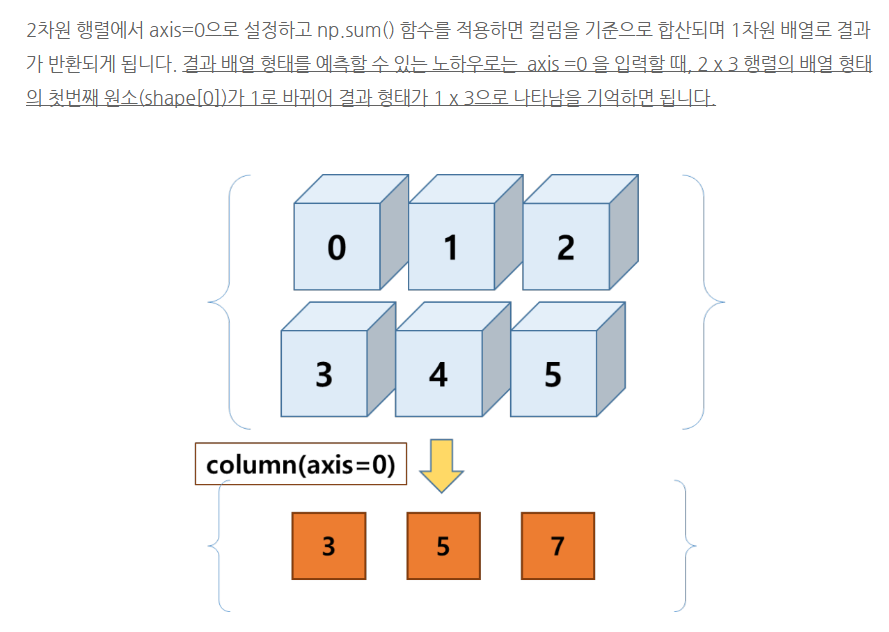

In [68]:
Image("[E-09] images/013.PNG")

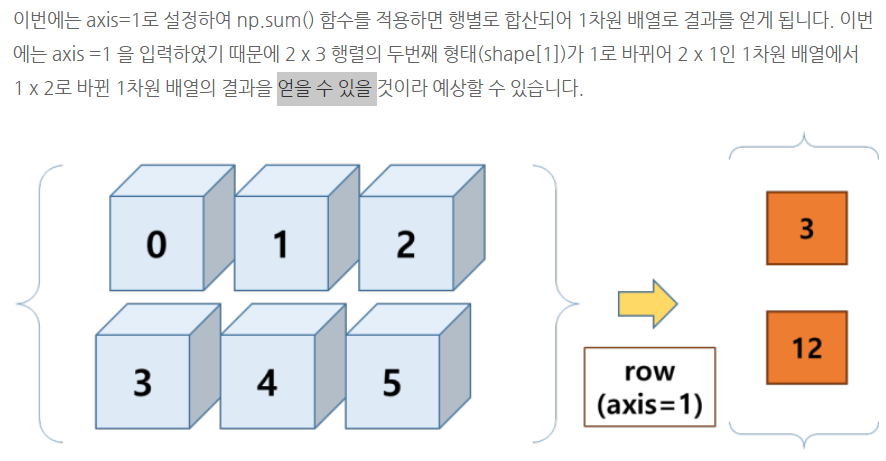

In [65]:
Image("[E-09] images/014.PNG")

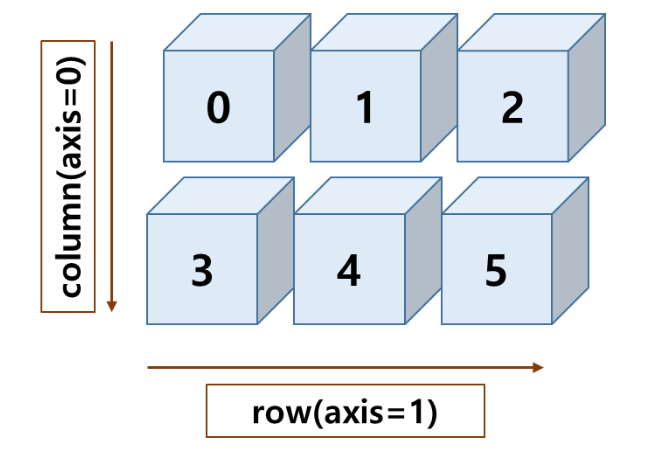

In [69]:
Image("[E-09] images/015.PNG")
# [출처] https://blog.naver.com/pmw9440/223028166828 

In [70]:
# 평균 출력
print(mean)

[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]


#### train_data의평균을 뺀 입력 데이터에서 표준편차를 나누기
데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만들기

In [71]:
std = train_data.std(axis=0) # 여기도 axis=0
train_data = train_data / std 

In [72]:
# 표준편차 출력
print(mean)

[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]


#### 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나누기

In [73]:
test_data = test_data - mean
test_data = test_data / std

### <span style = "color:orange;">질문! 왜 각각의 열에 대해서 평균과 표준편차를 구하지 않고, 전체에 대한 평균과 표준편차를 구했을까?</span>

처음 평균과 표준편차를 구할 때 axis=0에 대해 이해하지 못해 이런 궁금증이 생겼던 것 같다.    
<span style = "color:red;">**axis=0을 통해 각 컬럼별 평균과 표준편차를 구한 것이라는 것에 이해 완료**</span>    

**print(mean)을 하면**     
[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02 1.27408168e+01]     
**총 13개의 값이 나온다.**

**<span style = "color:red;">이는 13개 행에 대한 각 평균이라 할 수 있다.**</span>     


이걸 train_data = train_data - mean 이렇게 계산했는데     
그럼 <span style = "color:red;">**train_data에서 각 13개 컬럼에 대한 평균을 뺀 것**</span>이라고 해석할 수 있다.

### <span style = "color:orange;">질문! 왜 train_data의 평균과 표준편차를 test_data에서 뺐을까? test_data의 평균과 표준편차를 따로 구하지 않고?</span>

정확한 이유는 아직 찾지 못했다.     
**추측으로는 test_data에 train_data의 평균과 표준편차를 넣어도 무방하기 때문이 아닐까** 싶은데    
더 알아보아야 할 부분이다.

### Step 4. 데이터 나누기

해당 프로젝트 노드의 '모델 학습 및 시각화 코드'에 val_loss 부분이 있다.    
노드에서 검증데이터로 나누라고 하지는 않았지만      
이 코드로 미루어 보았을 때     
**모델 학습을 하기 전에 데이터들을 검증데이터로 나누어 주어야 할 것 같다.**

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=42)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(323, 13) (323,)
(81, 13) (81,)


<span style = "color:red;">**데이터를 나눈 기준**</span>      
- train_data, train_labels에서 train용과 validation을 나누어준다.
- test size는 0.2로 설정
- random_state = 42

<span style = "color:red;">**데이터를 나누는 명칭과 기준 다시 정리**</span>  

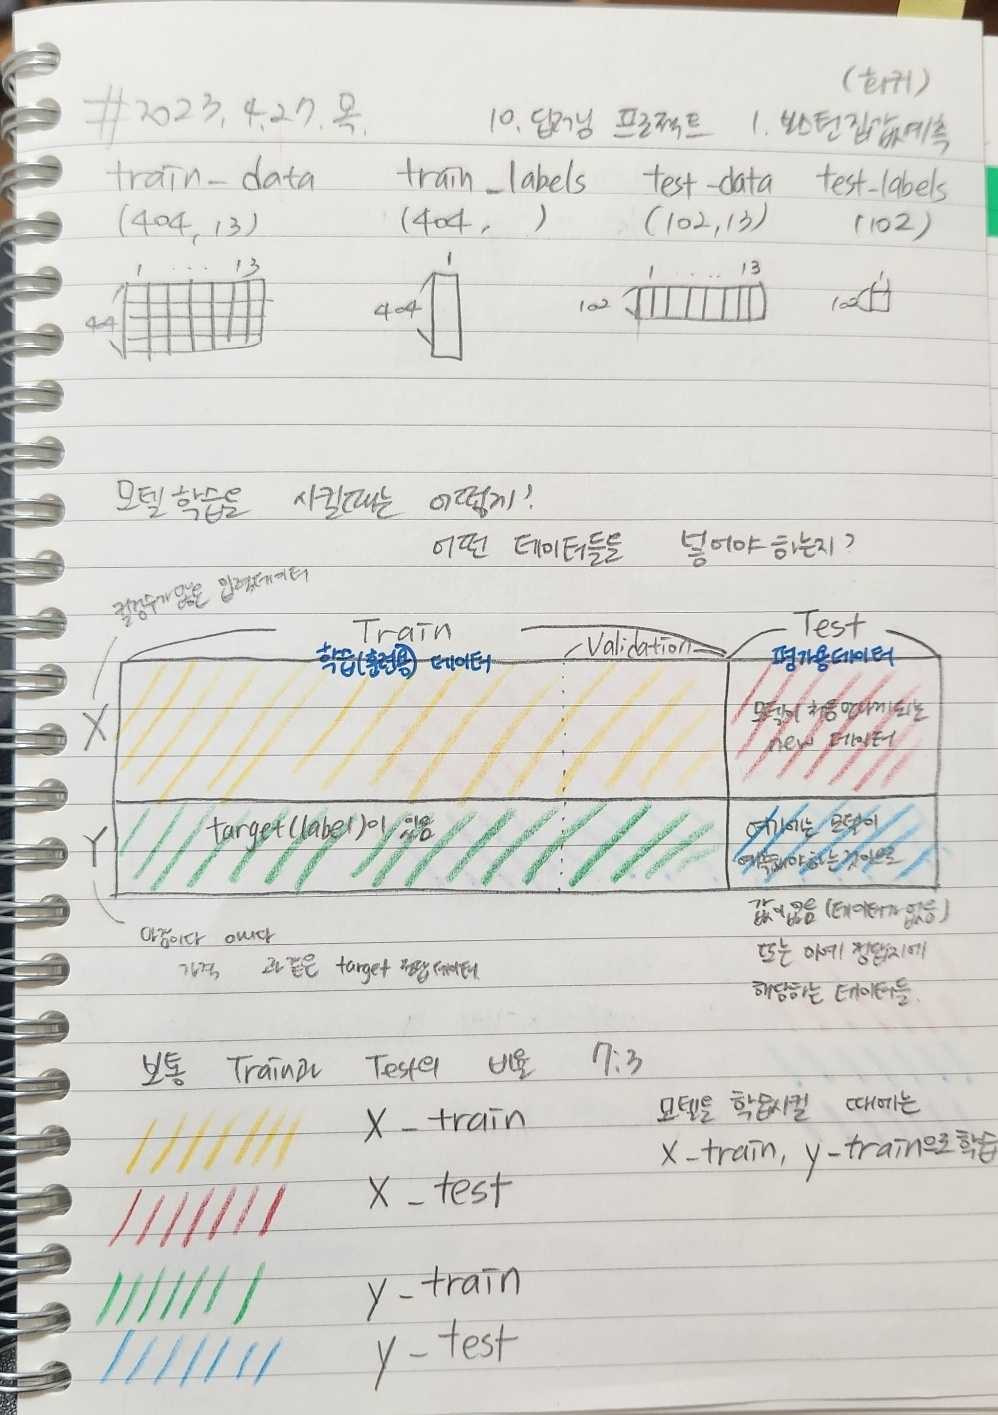

In [76]:
Image("[E-09] images/016.jpg")

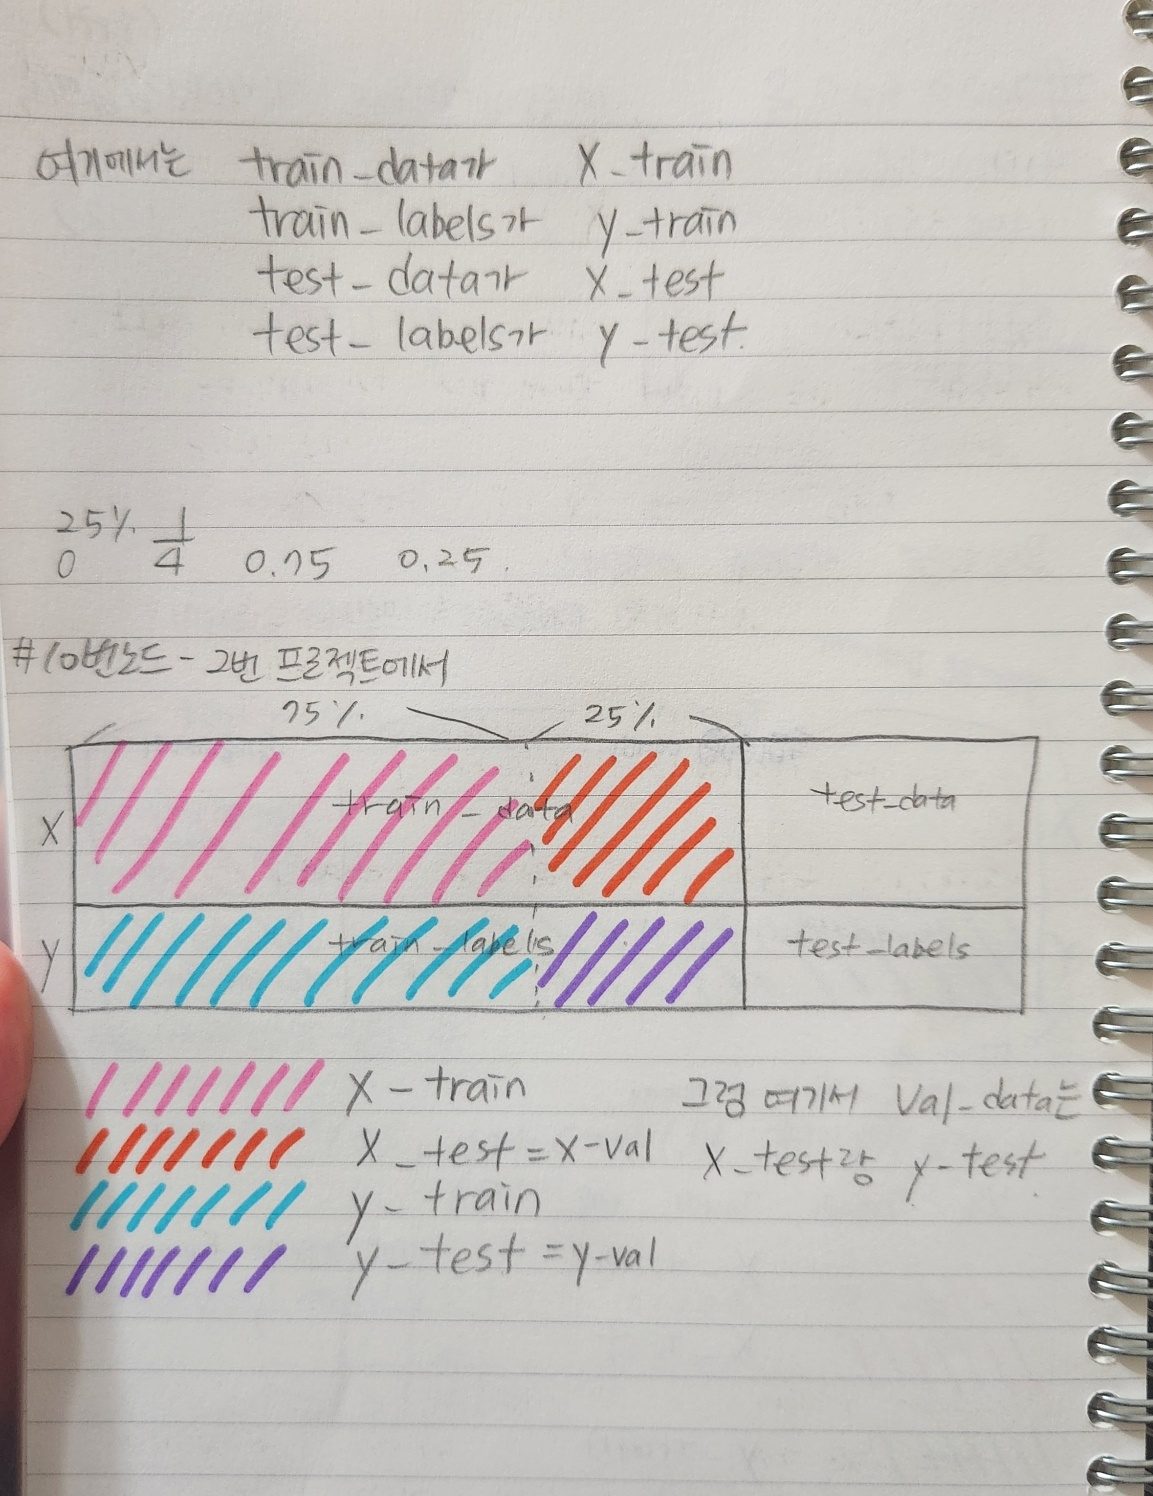

In [77]:
Image("[E-09] images/017.jpg")

### Step 5. 모델 만들기 및 최적화(컴파일)   

In [ ]:
# 노드에서는 아래와 같이 요구사항을 작성

# 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. 
# Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성

# 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

### 1. 모델 구성

Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성    
input_shape은 (train_data.shape[1], )으로 구성

In [79]:
model = models.Sequential()
model.add(layers.Input(shape=(x_train.shape[1], ))) # 입력층 그럼 여기가 13개가 될 것이다
model.add(layers.Dense(50, activation='linear')) # 50개로 설정 
model.add(layers.Dense(10)) 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                700       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
Total params: 1,210
Trainable params: 1,210
Non-trainable params: 0
_________________________________________________________________


### <span style = "color:red;">모델에 대한 기본 정보 요약</span>  

- 입력층 1개(유닛수 13개)    
- 은닉층 1개(유닛수 50개)    
- 출력층 1개(유닛수 10개)     

은닉층에서 활성화함수 'linear' 사용 (4.딥러닝 모델학습_4-4 노드의 회귀 모델 예시 참조)


출력층에서 softmax 활성화함수를 쓰던데, 분류 문제에서 보통 사용하는 것 같았다.    
회귀모델에서는 따로 출력층에 활성화함수를 사용하지 않는다 하여 사용하지 않음
[출처: 책 혼자 공부하는 머신러닝 p.369]     

### <span style = "color:orange;">질문! layers에서 units 수는 어떻게 정하지?</span>  

보스턴 집값 데이터로 모델을 만든 다른 블로그들을 찾아보니까            
같은 데이터셋이지만 다들 설정한 units 수가 다르다.     

<span style = "color:red;">**units 수는 하이퍼파라미터라고 한다.**</span>

한 자료에서는 units 수를 아무렇게 적어도 상관없지만 항아리 모양으로 적어주는게 효율이 좋다는 글도 보았다.     
(증가 > 감소 > 감소 형태)( >>> 출력층으로의 층의 진행 방향)      
[출처: https://blog.naver.com/hy0_na/223015165069]

### <span style = "color:orange;">질문! 가중치는 우리가 정하나? 아님 모델 안에서 나오게 되는건가?</span>  

어떤 자료를 보다보니 가중치가, 가중치의 크기가 설정되어 있는 경우에는 units수를 계산할 수 있을 것 같은데     
그게 아니면 어떻게 가중치의 크기를 설정하는지 궁금해졌다.   
[출처: https://jjeongil.tistory.com/974]

가중치는 우리가 데이터를 준비하는가?      
아니면 입력 데이터 x가 모델 안에서 학습되면서 자연스럽게 만들어지는 건가하는 부분이 혼동이 되었다.   

책 혼자 공부하는 머신러닝 p.136을 읽어보며      
<span style = "color:red;">**가중치, 기울기라는게 모델파라미터**</span>라고 다시 정리하게 되었다.     
그래서 컴퓨터가 가중치를 찾는다고 하면 내가 고민하던 가중치, 가중치 행렬을 내가 설정하지 않아도 괜찮다는 이야기

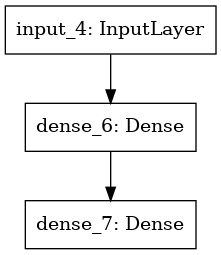

In [80]:
#어떤 모델이 생성되었는지 그림으로 확인
utils.plot_model(model)

### 2. 모델 컴파일

회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용

In [81]:
optimizer = optimizers.SGD()
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

### Step 6. 모델 학습 및 시각화    

In [82]:
# 노드에서는 아래와 같이 요구사항을 작성

# epochs와 batch size는 자유롭게 설정해 보세요.
# 모델 학습 후에는 모델 학습 결과를 시각화해 보세요.

모델 학습을 진행하기위해 **fit() 함수 적어주기**     
학습을 위해 x_train과 y_train를 지정하고, 학습 반복 횟수 epochs를 40으로 지정     
검증데이터도 있기에 fit() 안에 해당 부분을 추가함    

(4.딥러닝 모델학습_4-4 노드 참조)

In [83]:
history = model.fit(x_train, y_train, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
11/11 [==============================] - 0s 14ms/step - loss: 556.4593 - mae: 21.9153 - val_loss: 332.8032 - val_mae: 17.4869
Epoch 2/40
11/11 [==============================] - 0s 3ms/step - loss: 219.1938 - mae: 12.7033 - val_loss: 29.1644 - val_mae: 4.3767
Epoch 3/40
11/11 [==============================] - 0s 3ms/step - loss: 33.3511 - mae: 3.8731 - val_loss: 86.3784 - val_mae: 7.2805
Epoch 4/40
11/11 [==============================] - 0s 3ms/step - loss: 34.3140 - mae: 4.1367 - val_loss: 18.5053 - val_mae: 3.1865
Epoch 5/40
11/11 [==============================] - 0s 3ms/step - loss: 25.3455 - mae: 3.6822 - val_loss: 125.4104 - val_mae: 8.7448
Epoch 6/40
11/11 [==============================] - 0s 3ms/step - loss: 38.8979 - mae: 4.2699 - val_loss: 33.3637 - val_mae: 4.4846
Epoch 7/40
11/11 [==============================] - 0s 3ms/step - loss: 28.7403 - mae: 4.0560 - val_loss: 21.1359 - val_mae: 3.4635
Epoch 8/40
11/11 [==============================] - 0s 5ms/step - lo

#### 모델 학습 후 결과 시각화
모델이 학습하면서 각 epoch 마다 저장한 mae와 mse 지표를 차트를 통해서 확인    
모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여주기

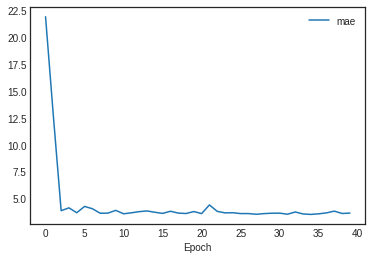

In [84]:
# 모델이 학습하면서 각 epoch 마다 저장한 mae와 mse 지표를 차트를 통해서 확인
plt.plot(history.history['mae'])
plt.xlabel('Epoch')
plt.legend(['mae'])
plt.show();

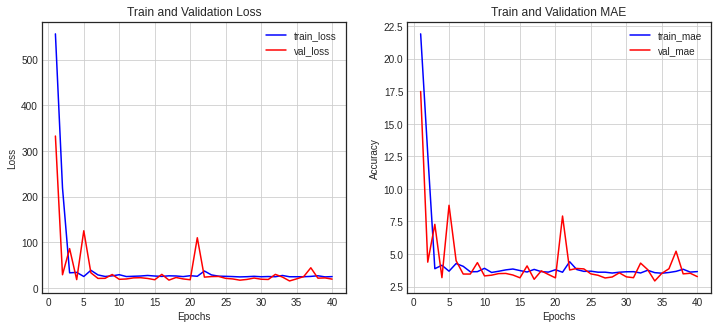

In [85]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 표현하기
# 노드에 있는 코드 인용

plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### <span style = "color:orange;">질문! MAE는 무엇을 의미?</span>

Mean Absolute Error, 평균 절대 오차     
회귀 모델의 성능을 평가하는 데 사용되는 일반적인 메트릭    
모델의 예측값과 실제값 사이의 절대 평균 차이를 측정한다.


MAE는 회귀 모델의 정확도를 측정하기에 간단하면서도 직관적이다.     
데이터의 극단적인 값에 영향을 받지 않기 때문에 이상치가 있거나 극단적인 값이 포함된 상황에서 유용하게 쓰일 수 있는 메트릭이 된다고 한다.

[출처: https://blog.naver.com/harim7898/223065762099]

### <span style = "color:red;">그래프 의미 해석</span>

1. 왼쪽 그래프는 train_loss과 val_loss를 보여주고 있다. Epochs이 진행되면서 loss값은 둘다 떨어지고 있다.
2. val_loss의 경우 epochs 20이 지나면서 loss의 값이 높아졌다가 내려가는 것을 볼 수 있다.
3. 오른쪽 그래프는 train_mae와 val_mae에 대한 그래프이다.
4. MAE는 평균 절대 오차이므로 오차가 낮아지는게 좋다고 볼 수 있다.
5. 역시 epochs이 진행되면서 MAE값이 내려가고 있는데 왼쪽 그래프도가 val_mae의 증감폭이 크다.

### Step 7. 모델 평가 및 예측
테스트 데이터를 가져와 모델 성능을 평가

In [87]:
# 모델의 평가를 위해 evaluate() 함수를 이용하여 데이터셋인 x_test, y_test에 대해서 mae 확인
# (4.딥러닝 모델학습_4-4 노드 참조)

In [86]:
model.evaluate(test_data, test_labels) 

4/4 [==============================] - 0s 2ms/step - loss: 25.0639 - mae: 3.6023


[25.06394386291504, 3.602280378341675]

### <span style = "color:red;">해석</span>
test_data, test_labels에 대해

**loss값은 25.0639**      
**mae는 3.6023**

이 나왔다.

# 2. 결론

1. 보스턴 집값에 대해 입력층 - 은닉층 1개 - 출력층으로 구성된 회귀 모델을 Sequential API 방법으로 만들어보았다.
2. loss(MSE) 값은 25.0639, MAE는 3.6023이 나왔다.

# 3. 탐구 및 시도 모음

### <span style = "color:orange;">질문! 라이브러리 구조는 어떻게 되어있는지?</span>    

[출처: ChatGPT]

1. `tensorflow`    
: This is the main TensorFlow library.      
It provides a range of functions and tools for building and training machine learning models.     
This includes a range of neural network layers, activation functions, loss functions, and optimization algorithms.     
    
2. `keras`
: Keras is a high-level neural network API that provides a simplified interface for building and training deep learning models.     
It is built on top of TensorFlow and provides a user-friendly API for defining and training complex neural network architectures.    
   
3. `models`      
: This module in Keras provides a range of pre-built neural network architectures that can be easily used for building models.     
These include popular architectures such as Convolutional Neural Networks (CNNs), Recurrent Neural Networks (RNNs), and many others.     

4. `layers`      
: This module in Keras provides a range of neural network layers that can be used for building custom models.         
These include standard layers such as fully connected layers, convolutional layers, and recurrent layers,     
as well as more specialized layers such as dropout, pooling, and normalization layers.     

5. `optimizers`     
: This module in Keras provides a range of optimization algorithms that can be used for training neural networks.      
These include stochastic gradient descent (SGD), adaptive learning rate methods such as Adam and Adagrad, and many others.      

6. `utils`     
: This module in Keras provides a range of utility functions that can be used for data preprocessing, model evaluation, and other tasks.        
These include functions for loading and preprocessing data, as well as functions for visualizing model performance and structure.    

Overall, these modules provide a powerful set of tools for building and training deep learning models using TensorFlow and Keras.  

Some of the modules I mentioned are specific to Keras, while others are part of the broader TensorFlow library.       

The tensorflow module is the core TensorFlow library, while the keras module provides the high-level Keras API that is built on top of TensorFlow.

The models, layers, optimizers, and utils modules are specific to Keras and provide tools for building and training deep learning models using the Keras API.

So in summary, tensorflow is the main library, while keras is a high-level API built on top of TensorFlow.      
The other modules I mentioned are specific to Keras and provide tools for building and training deep learning models.

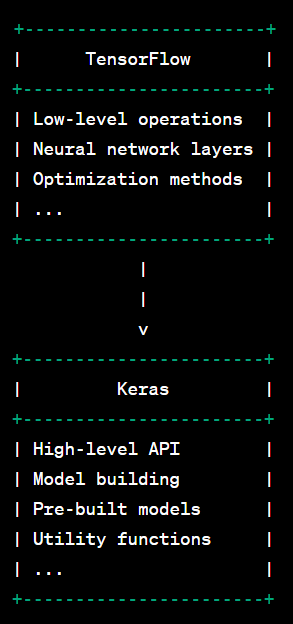

In [5]:
Image("[E-09] images/021.PNG")

As you can see, Keras is built on top of TensorFlow and provides a higher-level API for building and training deep learning models.

Here is a diagram that shows the various modules within Keras:

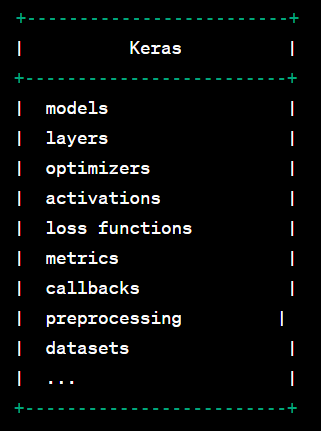

In [6]:
Image("[E-09] images/022.PNG")

Each of these modules provides a different set of tools for building and training deep learning models using Keras.    

I hope these diagrams help to clarify the relationships between TensorFlow and Keras, as well as the various modules within Keras.  

### <span style = "color:red;">주피터 노트북에 이미지를 불러올 때, 경로 관련</span>    

**Image("project/first-repository/011.png")**    
**Image("011.png")**    
처음에 위와 같이 설정했는데 오류가 났다.   

FileNotFoundError: No such file or directory: 'project/first-repository/011.png'


추후 알게 된 사실은 <span style = "color:red;">**경로와 관련한 에러인 것 같다는 것**</span>  
내가 작성하고 있는 쥬피터 파일 폴더의 하위폴더에 이미지가 들어가 있는 경우 

**Image("[E-09] images/011.png")**
위와 같이 쓰면 되는 것

### <span style = "color:red;">표준화 관련 내가 해본 방법 1, 2</span> 

In [40]:
# 각 피처마다 평균을 구하기 위해 인덱싱과 슬라이싱 활용

train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [41]:
train_data[0][0]

1.23247

In [42]:
train_data[0][2]

8.14

In [43]:
train_data[:][0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

### <span style = "color:orange;">질문! 왜 train_data[0]와 train_data[:][0]의 결과값이 같다고 나오지?</span> 

음.. 해결 못 함

In [44]:
train_data[:][:1]

array([[  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
         91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
         18.72   ]])

음.. 이러면    
train_data[0]    
train_data[:][0]    
train_data[:][:1]    

값이 다 똑같이 나온다    
:1은 1열을 포함하지 않고 0열만 포함하는 거니 왜 같은지 이해됨

In [19]:
train_data[:]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [20]:
train_data[:][:2] 

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00]])

### <span style = "color:orange;">질문! 위에서 [:][:2]라고 하면 열의 범위를 제한해줄 거라고 생각했는데, 0행과 1행이 나온다.. 왜지?</span>  


#### <span style = "color:red;">Reference 노드 3번 참조!!!</span>

In [24]:
A = np.arange(9).reshape(3,3)
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [22]:
print(A[:,2:])
print("--------------")
print(A[:,1:])
print("--------------")
print(A[:,:])
print("--------------")

[[2]
 [5]
 [8]]
--------------
[[1 2]
 [4 5]
 [7 8]]
--------------
[[0 1 2]
 [3 4 5]
 [6 7 8]]
--------------


#### <span style = "color:red;">[:][:1] 이렇게 대괄호로 두 부분을 나누는 것이 아니라 []안에 다 넣어야 할까?</span> 

In [25]:
train_data[:,:2]

array([[1.23247e+00, 0.00000e+00],
       [2.17700e-02, 8.25000e+01],
       [4.89822e+00, 0.00000e+00],
       [3.96100e-02, 0.00000e+00],
       [3.69311e+00, 0.00000e+00],
       [2.83920e-01, 0.00000e+00],
       [9.18702e+00, 0.00000e+00],
       [4.09740e+00, 0.00000e+00],
       [2.15505e+00, 0.00000e+00],
       [1.62864e+00, 0.00000e+00],
       [9.59571e+00, 0.00000e+00],
       [1.88110e+01, 0.00000e+00],
       [1.39140e-01, 0.00000e+00],
       [3.83684e+00, 0.00000e+00],
       [3.87350e-01, 0.00000e+00],
       [7.35341e+01, 0.00000e+00],
       [6.53876e+00, 0.00000e+00],
       [6.46600e-02, 7.00000e+01],
       [3.44500e-02, 8.25000e+01],
       [1.48660e-01, 0.00000e+00],
       [3.76619e+01, 0.00000e+00],
       [2.76300e-02, 7.50000e+01],
       [1.77800e-02, 9.50000e+01],
       [6.32000e-03, 1.80000e+01],
       [3.04100e-02, 0.00000e+00],
       [9.82349e+00, 0.00000e+00],
       [8.82900e-02, 1.25000e+01],
       [2.72900e-02, 0.00000e+00],
       [6.71910e-01,

### 이렇게 하니까 됐다!!!!!!

In [26]:
train_data[:,:1] #0번째 열

array([[1.23247e+00],
       [2.17700e-02],
       [4.89822e+00],
       [3.96100e-02],
       [3.69311e+00],
       [2.83920e-01],
       [9.18702e+00],
       [4.09740e+00],
       [2.15505e+00],
       [1.62864e+00],
       [9.59571e+00],
       [1.88110e+01],
       [1.39140e-01],
       [3.83684e+00],
       [3.87350e-01],
       [7.35341e+01],
       [6.53876e+00],
       [6.46600e-02],
       [3.44500e-02],
       [1.48660e-01],
       [3.76619e+01],
       [2.76300e-02],
       [1.77800e-02],
       [6.32000e-03],
       [3.04100e-02],
       [9.82349e+00],
       [8.82900e-02],
       [2.72900e-02],
       [6.71910e-01],
       [1.77830e-01],
       [4.59000e-02],
       [5.09017e+00],
       [7.75223e+00],
       [1.05393e+00],
       [3.35900e-02],
       [3.41090e-01],
       [8.40540e-01],
       [1.15172e+00],
       [3.51140e-01],
       [1.01530e-01],
       [1.50860e-01],
       [1.59360e-01],
       [5.08300e-02],
       [1.10874e+01],
       [1.33598e+01],
       [7.

In [27]:
# 평균을 구해보기

train_data[:,:1].mean() # 이렇게 하면 평균을 구할 수 있나?

3.74511056930693

(Reference 3번 노드 참조)     
평균을 사용할 때에는 .mean()을 붙이면 되는 것 같다   
nums = numbers() # 이것은 파이썬 리스트입니다.    
num = np.array(nums) # 리스트를 Numpy ndarray로 변환합니다.   
#### <span style = "color:red;">num.mean()</span>    

In [28]:
# train_data_index0_mean = train_data[:,:1].mean() # 변수에 저장
# train_data_index1_mean = train_data[:,:1].mean() # 변수에 저장

In [92]:
train_data[:,1] # 인덱스 1에 해당하는 열만 보고 싶으면 이렇게

array([-0.48361547,  2.99178419, -0.48361547, -0.48361547, -0.48361547,
       -0.48361547, -0.48361547, -0.48361547, -0.48361547, -0.48361547,
       -0.48361547, -0.48361547, -0.48361547, -0.48361547, -0.48361547,
       -0.48361547, -0.48361547,  2.46520849,  2.99178419, -0.48361547,
       -0.48361547,  2.67583877,  3.5183599 ,  0.27465355, -0.48361547,
       -0.48361547,  0.04296024, -0.48361547, -0.48361547, -0.48361547,
        1.7280025 , -0.48361547, -0.48361547, -0.48361547,  2.67583877,
       -0.48361547, -0.48361547, -0.48361547, -0.48361547, -0.48361547,
       -0.48361547, -0.48361547, -0.48361547, -0.48361547, -0.48361547,
       -0.48361547, -0.48361547, -0.48361547,  0.35890566, -0.48361547,
       -0.48361547, -0.48361547, -0.48361547,  1.7280025 , -0.48361547,
       -0.48361547, -0.48361547, -0.48361547,  1.20142679, -0.48361547,
       -0.48361547,  0.35890566, -0.48361547, -0.48361547, -0.48361547,
       -0.48361547, -0.48361547, -0.48361547, -0.48361547, -0.48

### <span style = "color:orange;"> 질문! 왜 아래 train_data[:,:2] 이렇게 했을 때 보이던 것과는 또 다를까, 같은 값이라고 생각해도 될까?</span>

In [93]:
train_data[:,2]

array([-0.43576161, -1.33391162,  1.0283258 , -0.86940196,  1.0283258 ,
       -0.54747912,  1.0283258 ,  1.24588095,  1.24588095,  1.58544339,
        1.0283258 ,  1.0283258 , -1.03697823,  1.0283258 ,  2.13815109,
        1.0283258 ,  1.0283258 , -1.3030423 , -1.33391162, -0.37402299,
        1.0283258 , -1.19867463, -1.41622978, -1.29275253, -0.86940196,
        1.0283258 , -0.47545073, -0.59304811, -0.43576161, -0.20791668,
       -0.85029238,  1.0283258 ,  1.0283258 , -0.43576161, -1.19867463,
       -0.54747912, -0.43576161, -0.43576161, -0.54747912,  0.25365304,
        2.44537425, -0.61656759, -0.86940196,  1.0283258 ,  1.0283258 ,
       -0.43576161,  1.58544339, -0.43576161, -1.04873796,  1.0283258 ,
       -0.86940196,  1.0283258 , -0.72093526, -0.85029238,  1.24588095,
        2.13815109,  1.0283258 ,  1.0283258 , -0.69006595, -1.03697823,
        2.13815109, -0.60921775,  1.0283258 , -0.37402299,  1.0283258 ,
        1.0283258 ,  1.58544339,  1.0283258 ,  1.0283258 , -0.07

일단 이렇게 해보자

In [32]:
train_data_index0_mean = train_data[:,:1].mean()
train_data_index1_mean = train_data[:,1].mean() 
train_data_index2_mean = train_data[:,2].mean() 
train_data_index3_mean = train_data[:,3].mean() 
train_data_index4_mean = train_data[:,4].mean() 
train_data_index5_mean = train_data[:,5].mean() 
train_data_index6_mean = train_data[:,6].mean() 
train_data_index7_mean = train_data[:,7].mean() 
train_data_index8_mean = train_data[:,8].mean() 
train_data_index9_mean = train_data[:,9].mean() 
train_data_index10_mean = train_data[:,10].mean() 
train_data_index11_mean = train_data[:,11].mean() 
train_data_index12_mean = train_data[:,12].mean() 

In [33]:
train_data_index13_mean = train_data[:,13].mean() 

IndexError: index 13 is out of bounds for axis 1 with size 13

이렇게 하면      
IndexError: index 13 is out of bounds for axis 1 with size 13    
에러가 난다    
<span style = "color:red;">**왜? 총 13개의 컬럼이므로 0부터 숫자를 매기면 12까지임**</span>    

그럼 변수에 각 특성별 열을 할당하고 평균 구하기 완료    

평균을 빼라던데..     
x-xmean 이거 이야기 하나 보다

각 데이터들에서 - 평균을 하려면 많은거 같은데... 일일이 하기가 어려울 것 같다는 생각에 도달

**사이킷럿의 표준화 방법을 사용해보면? 이라는 생각으로 이동함**

In [45]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
train_data_index0_standardscaler = scaler.fit_transform(train_data[:,:1])

In [37]:
train_data_index0_standardscaler

array([[-2.72246334e-01],
       [-4.03426512e-01],
       [ 1.24940200e-01],
       [-4.01493536e-01],
       [-5.63429746e-03],
       [-3.75022379e-01],
       [ 5.89634631e-01],
       [ 3.81708022e-02],
       [-1.72284157e-01],
       [-2.29321042e-01],
       [ 6.33916474e-01],
       [ 1.63239949e+00],
       [-3.90709392e-01],
       [ 9.93894693e-03],
       [-3.63815668e-01],
       [ 7.56168502e+00],
       [ 3.02693838e-01],
       [-3.98779351e-01],
       [-4.02052626e-01],
       [-3.89677894e-01],
       [ 3.67490747e+00],
       [-4.02791577e-01],
       [-4.03858832e-01],
       [-4.05100530e-01],
       [-4.02490362e-01],
       [ 6.58596593e-01],
       [-3.96219025e-01],
       [-4.02828417e-01],
       [-3.32983396e-01],
       [-3.86517304e-01],
       [-4.00812010e-01],
       [ 1.45738115e-01],
       [ 4.34174147e-01],
       [-2.91591266e-01],
       [-4.02145807e-01],
       [-3.68827971e-01],
       [-3.14712220e-01],
       [-2.80995652e-01],
       [-3.6

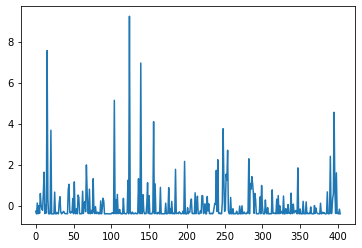

In [39]:
plt.plot(train_data_index0_standardscaler)
plt.show()

#### <span style = "color:red;"> 음.. 그래프를 어떻게 해석해야할지</span>

### <span style = "color:orange;">모델 만들며 내가 쌓아본 layers 구축 과정, layers에 대한 이해</span> 
(3.딥러닝 구조와 모델_3-2노드 참조)
 
**결론** 
레이어는 아래와 같이 만들수도 위처럼 모델을 시퀀셜로 쌓을 때에는 
model = models.Sequential()
model.add(layers.Input(shape=(x_train.shape[1], ))) 
model.add(layers.Dense(50, activation='linear'))  
model.add(layers.Dense(10)) 
model.summary()
이렇게 많이 사용하는 것 같다.

 
#### Input 객체
딥러닝 모델의 입력을 정의할 때 사용하는 Input 객체는 입력 데이터의 모양인 shape와 예상되는 데이터 유형인 dtype 등을 포함하고 있다.    
Input 객체는 배치 크기를 batch_size로 지정할 수 있고, name을 통해서 이름을 지정할 수도 있다.    
예: keras.Input(shape=(28, 28), dtype=tf.float32, batch_size=16, name='input')

keras.Input(shape=(train_data.shape[1], ), dtype=tf.float32, name='input') 

train_data.shape[1]을 넣으라고 했는데, shape을 보면 13이니, 13이라는 것 과 같은 말? 

In [17]:
train_data.shape

(404, 13)

#### Dense 레이어
Dense 레이어는 완전연결계층(Fully-Connected Layer)으로 노드수(유닛수)를 지정하면 생성된다. 

layers.Dense(13, activation='relu', name='Dense Layer') 

위에서 13개라고 하니까 완전연결계층의 노드수는 13? 우리도 lelu 쓰면 될거 같아

#### Activation 레이어

여기에서의 activation은 활성화함수     
활성화 함수는 이전 레이어의 결과값을 변환하여 다른 레이어로 전달하는 역할을 하는데,      
크게 선형 활성화 함수(Linear activation function)와 비선형 활성화 함수(Non-linear activation function)로 구분할 수 있다.      
다만 딥러닝에서는 선형 활성화 함수를 사용하면 다층 구조를 사용하는 의미가 없기 때문에      
모델 표현력을 위해서 비선형 활성화 함수를 사용한다.

**활성화함수의 종류**
- relu
- sigmoid
- softmax
- softplus
- softsign
- tanh
- selu
- elu 
- exponential

#### Flatten 레이어
Flatten 레이어는 배치 크기(또는 데이터 크기)를 제외하고 데이터를 1차원 형태로 평평하게 변환한다.

**flatten 레이어는 언제 필요할까? 이미지 입력 데이터일때? 이번 보스턴에서도 필요할까?**

### <span style = "color:orange;">Sequential API 방법으로 모델을 구성할 때 코드를 작성하는 방법이 2가지있는 것 같다.</span> 
(3.딥러닝 구조와 모델_3-3노드 참조)

1. Sequential 객체 생성 후,add()를 이용하여 사용할 레이어들을 추가하는 방법
2. 다른 방법으로는 Sequential 인자에 한번에 추가하는 방법

### <span style = "color:orange;">질문! 아래와 같은 코드는 어떻게 적용해야 하지?</span> 
(LMS 4.딥러닝 모델학습_4-4 참조)


**result = model.predict(X)**    

**plt.scatter(X, y)**    
**plt.plot(X, result, 'r')**    
**plt.show()**


<span style = "color:red;">**적용 못했다. 이 코드는**</span> 

셀프 검정인가? 모델에 과적합, 과소적합인지 보기 위해서?     
나의 결론.     
선형회귀를 위한 4-4노드의 데이터셋은 y=ax+b에 대한 식이다. 데이터의 타입이 이것과는 다른 것 같다.    
이 4-4 노드 예시에서 X의 크기는 (200,1)이다. 200개의 값이 일렬로 있는 1차원 배열인데     
우리가 다루는 보스턴 데이터는 train_data의 shape이 (404,13)이다. 2차원 배열임     
그럼 이걸 plot으로 표현하는게 가능한가? 어렵지 않을까? 그래서 안되는거 아닐까?

(노드 출처)      
레이어에서 사용하는 가중치(weights)와 바이어스(biases)를 get_weights() 함수를 통해서 얻을 수 있다.     
즉, 레이어에 있는 가중치와 바이어스를 통해 선형 회귀식을 얻을 수 있다.

<span style = "color:red;">**적용하고 싶었는데, 못한 코드**</span> 

**weights, biases = layer.get_weights()**    
**print(weights)**    
**print(biases)**

(노드 출처)    
딥러닝 모델에서 학습된 가중치(weights)와 바이어스(biases)를 통해 선형회귀식을 np.array(weights * X + biases)로 표현할 수 있다.    
레이어에서 사용하는 가중치(weights)와 바이어스(biases)를 get_weights() 함수를 통해서 얻을 수 있다.     
즉, 레이어에 있는 가중치와 바이어스를 통해 선형 회귀식을 얻을 수 있다.    

**plt.scatter(X, y)**     
**plt.plot(X, np.array(weights * X + biases), 'r')**     
**plt.show()**     

우리는 이 보스턴 데이터에서 선형회귀식을 도출할 수 없나?      
<span style = "color:red;">**적용하고 싶었는데, 못한 코드**</span> 

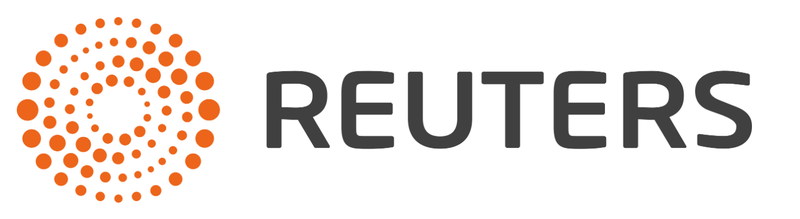

In [96]:
Image("[E-09] images/018.png")

# 4. Reuters 딥러닝 모델 
- Step 1. 라이브러리 및 데이터 불러오기
- Step 2. 데이터 나누기, 데이터 구조 파악     
- Step 3. 데이터 전처리(원핫인코딩)     
- Step 4. 모델 구성 및 컴파일     
- Step 5. 모델 학습 및 시각화    
- Step 6. 모델 평가 및 예측

### Step 1. 라이브러리 및 데이터 불러오기

In [7]:
from tensorflow.keras import callbacks
from keras.datasets import reuters

In [24]:
# 노드 요청사항
# 데이터셋은 keras.datasets에서 불러올 수 있는 reuters 데이터 셋을 활용하고, 
# 이때 파라미터 조정을 통해 단어의 개수는 10000개로 제한(num_words=10000).

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

### Step 2. 데이터 나누기, 데이터 구조 파악

In [ ]:
# 노드 요청사항

# reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리 
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력

In [25]:
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

print(len(train_data))    
print(len(val_data))   
print(len(test_data))   
print(len(set(train_labels)))    
  
**노드에서는 위와 같이 출력하라고 되어있는데, print(len(val_data)) 이 부분은 val_data이 x_val을 의미하는 것 같다.**

In [26]:
print(len(x_train))
print(len(y_train))
print(len(x_val))
print(len(y_val))
print(len(test_data))
print(len(test_labels))

6736
6736
2246
2246
2246
2246


In [28]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(test_data.shape)
print(test_labels.shape)

(6736,)
(6736,)
(2246,)
(2246,)
(2246,)
(2246,)


In [29]:
x_train

array([list([1, 53, 151, 26, 14, 68, 927, 39, 4074, 4220, 14, 318, 3859, 88, 19, 4927, 2588, 14, 7257, 5878, 155, 230, 53, 360, 26, 14, 142, 26, 39, 4815, 2115, 14, 2442, 7246, 88, 12, 6594, 5007, 14, 19, 5460, 1501, 17, 12]),
       list([1, 486, 341, 147, 26, 14, 119, 26, 255, 219, 93, 360, 8955, 94, 318, 17, 12]),
       list([1, 2949, 1041, 10, 341, 142, 26, 14, 142, 26, 255, 2949, 1041, 894, 341, 188, 26, 14, 188, 26, 255, 219, 91, 440, 146, 93, 124, 123, 49, 1014, 796, 13, 25, 303, 3852, 163, 6, 252, 296, 22, 252, 102, 208, 6, 10, 2, 3523, 17, 12]),
       ...,
       list([1, 603, 295, 277, 171, 33, 805, 240, 125, 591, 101, 189, 28, 10, 146, 456, 44, 44, 20, 27, 70, 32, 58, 70, 12, 1257, 475, 7, 807, 6, 997, 4169, 76, 1654, 21, 125, 142, 29, 1265, 295, 277, 790, 8, 4, 295, 277, 591, 101, 23, 2, 306, 70, 72, 1257, 475, 488, 4, 2403, 21, 142, 29, 60, 1265, 582, 27, 4, 295, 277, 171, 1464, 139, 4, 738, 60, 1265, 28, 47, 59, 20, 57, 1086, 470, 153, 904, 287, 21, 4, 2783, 5, 226, 219

In [30]:
test_data

array([list([1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]),
       list([1, 2768, 283, 122, 7, 4, 89, 544, 463, 29, 798, 748, 40, 85, 306, 28, 19, 59, 11, 82, 84, 22, 10, 1315, 19, 12, 11, 82, 52, 29, 283, 1135, 558, 2, 265, 2, 6607, 8, 6607, 118, 371, 10, 1503, 281, 4, 143, 4811, 760, 50, 2088, 225, 139, 683, 4, 48, 193, 862, 41, 967, 1999, 30, 1086, 36, 8, 28, 602, 19, 32, 11, 82, 5, 4, 89, 544, 463, 41, 30, 6273, 13, 260

In [31]:
test_labels

array([ 3, 10,  1, ...,  3,  3, 24])

In [32]:
y_train

array([ 3,  3,  3, ..., 20,  3,  3])

In [33]:
y_val

array([24,  4, 24, ...,  3, 19,  3])

### Step 3. 데이터 전처리(원핫인코딩)

In [ ]:
# 노드 요청사항

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환한다

(8.가중치 초기화와 배치 정규화_8-3 참조)

### 1. 인덱스를 단어들로 변환

Reuters 데이터셋도 단어 인덱스로만 구성되어 있기 때문에      
reuters.get_word_index() 함수를 통해 얻은 단어 인덱스 딕셔너리를 이용해 인덱스를 단어들로 변환이 가능하다고 한다.      

In [34]:
word_index = reuters.get_word_index()

인덱스 단어 딕셔너리 형태로 만들기 위해서 단어 인덱스 딕셔너리를 역으로 변환시킬 수도 있다고 한다.

In [35]:
index_word = dict([(value, key) for (key, value) in word_index.items()])

train_data[0]의 각 인덱스에 매핑되는 단어들로 연결하여 하나의 리뷰를 만들어 줄 수 있다.

In [36]:
news = ' '.join([str(i) for i in train_data[0]])
news

'1 2 2 8 43 10 447 5 25 207 270 5 3095 111 16 369 186 90 67 7 89 5 19 102 6 19 124 15 90 67 84 22 482 26 7 48 4 49 8 864 39 209 154 6 151 6 83 11 15 22 155 11 15 7 48 9 4579 1005 504 6 258 6 272 11 15 22 134 44 11 15 16 8 197 1245 90 67 52 29 209 30 32 132 6 109 15 17 12'

단어 인덱스에서 0은 패딩을 의미하는 토큰인 pad,    
1은 문장의 시작을 의미하는 토큰인 sos,    
2는 OOV(Out Of Vocabulary)를 의미하는 토큰인 unk으로 지정되어 있다.    
그러므로 i-3으로 인덱스를 맞춰주고, 해당 토큰들은 ?로 대체할 수 있다고 한다.   

In [37]:
news = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
news

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### 2. 원핫인코딩

딥러닝 모델의 학습에 사용하기 위해서는 텍스트 데이터를 벡터로 변환해야 한다.    
원핫인코딩으로 텍스트를 0과 1의 벡터로 변환

In [38]:
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(x_train)
x_val = one_hot_encoding(x_val)
x_test = one_hot_encoding(test_data) #test_data를 x_test로 이름 변경

print(x_train[0])

[0. 1. 0. ... 0. 0. 0.]


In [116]:
# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환한다

(8.가중치 초기화와 배치 정규화_8-3 참조)    
Reuters 데이터셋에서 레이블은 46개의 주제를 구분하기 위한 인덱스로 되어 있다.

In [39]:
print(y_train[5])
print(y_train[15])
print(y_train[25])
print(y_train[35])
print(y_train[45])

38
3
3
3
3


뉴스 주제인 레이블도 원-핫 인코딩(범주형 인코딩)을 이용해 변환을 수행해 주어야 한다.     
케라스에서는 utils.to_categorical()을 이용해 쉽게 변환할 수 있다.

In [40]:
from tensorflow.keras import utils

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(test_labels) #test_labels를 y_test로 이름 변경

print(y_train[5])
print(y_train[15])
print(y_train[25])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### <span style = "color:orange;">질문! to_categorical()란?</span> 

karas.utils.np_utils 패키지에 있다.    
원핫인코딩을 해주는 함수    


**원핫인코딩이란?**    
10진 정수 형식을 특수한 2진 binary 형식으로 변경해준다.     

파라미터로 값의 크기만큼 0으로 된 배열을 만들고, 파라미터 값 위치에만 1(hot을 의미)을 넣어준다.    
[출처: https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=ksg97031&logNo=221302568652]

### Step 4. 모델 구성 및 컴파일

In [ ]:
# 노드 요청사항

# BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성

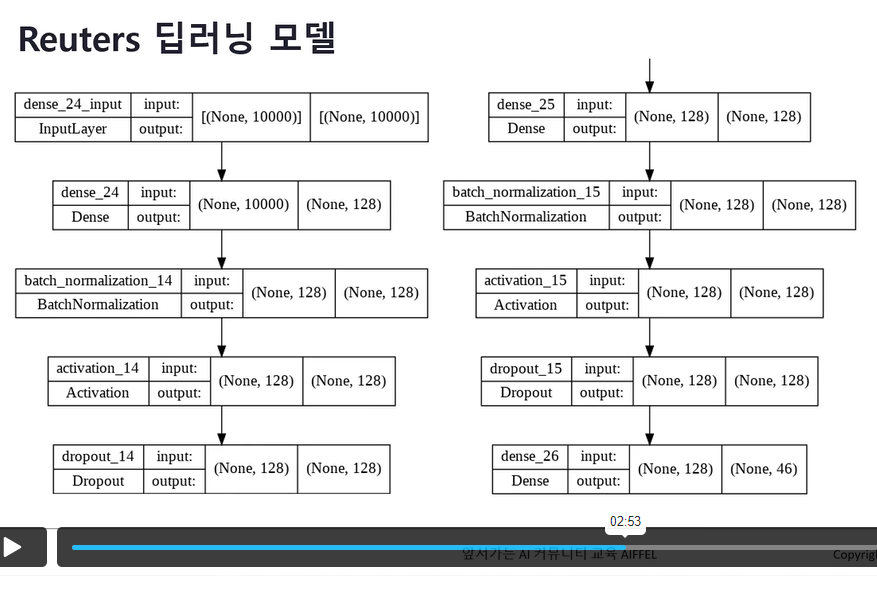

In [41]:
Image("[E-09] images/020.PNG")

#### 출처: LMS 10.딥러닝 프로젝트_10-3.Reuters 딥러닝 모델 강의

### 1. 모델 구성

In [43]:
model = models.Sequential()
model.add(layers.Input(shape=(x_train.shape[1], ))) # 입력 units 수는 6736
model.add(layers.Dense(10000, name='hidden_1')) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2)) # 7-4 노드에서 20%로 드롭아웃을 주어서 여기에서도 그렇게 적용해 봄
model.add(layers.Dense(128, name='hidden_2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(46, activation='softmax', name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 10000)             100010000 
_________________________________________________________________
batch_normalization (BatchNo (None, 10000)             40000     
_________________________________________________________________
activation (Activation)      (None, 10000)             0         
_________________________________________________________________
dropout (Dropout)            (None, 10000)             0         
_________________________________________________________________
hidden_2 (Dense)             (None, 128)               1280128   
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0

### <span style = "color:red;">모델에 대한 기본 정보 요약</span> 

- 입력층 1개(유닛수 6,736개_x_train의 행의 개수)
- 은닉층 1번째(유닛수 10,000개)
- 배치정규화
- 활성화함수(ReLU)
- 드롭아웃(20%)
- 은닉층 2번째(유닛수 128개)
- 배치정규화
- 활성화함수(ReLU)
- 드롭아웃(20%)
- 출력층 1개(유닛수 46개, 활성화함수 softmax)

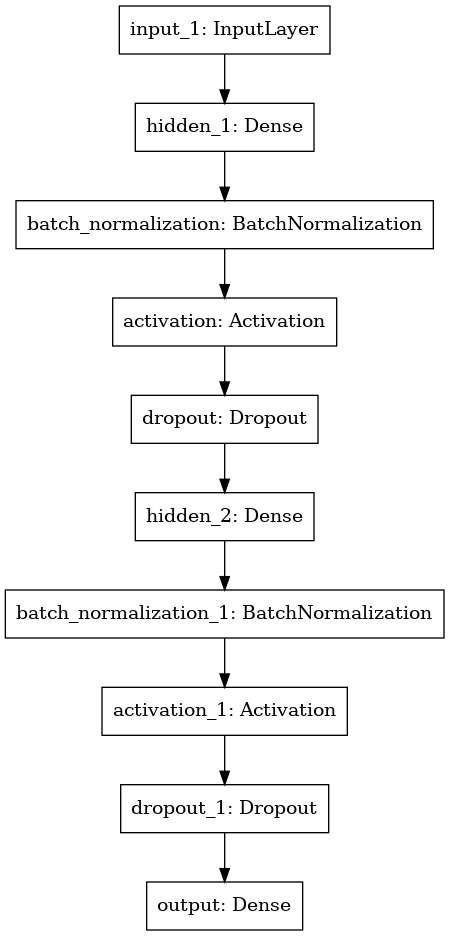

In [92]:
#어떤 모델이 생성되었는지 그림으로 확인
utils.plot_model(model)

### 2. 모델 컴파일

In [45]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

(8.가중치 초기화와 배치 정규화_8-3 참조) 

**다중분류 문제이므로 categorical_crossentropy 사용**

### <span style = "color:orange;">질문! 배치 정규화란?</span> 

모델에 입력되는 샘플들을 균일하게 만드는 방법   
가중치의 활성화값이 적당히 퍼지게끔 '강제'로 적용시키는 것을 의미한다.     

보통 미니배치 단위로 데이터의 평균이 0, 표준편차는 1로 정규화를 수행하여 학습 자체가 빨리 진행될 수 있도록 만들어주고,     
학습 후에도 새로운 데이터에 일반화가 잘 될 수 있도록 도와준다.     
또한, 초기값에 크게 의존하지 않아도 되고, 과대적합을 방지하는 역할을 수행한다.     

배치 정규화는 데이터 전처리 단계에서 진행해도 되지만 정규화가 되어서 레이어에 들어갔다는 보장이 없으므로      
주로 Dense 레이어 이후, 활성화 함수 이전에 활용된다.    

다만 일반적으로 Dense 레이어와 Activation 활성함수 레이어 사이에 추가해야 한다.    
(LMS 8-4.배치 정규화 참조)

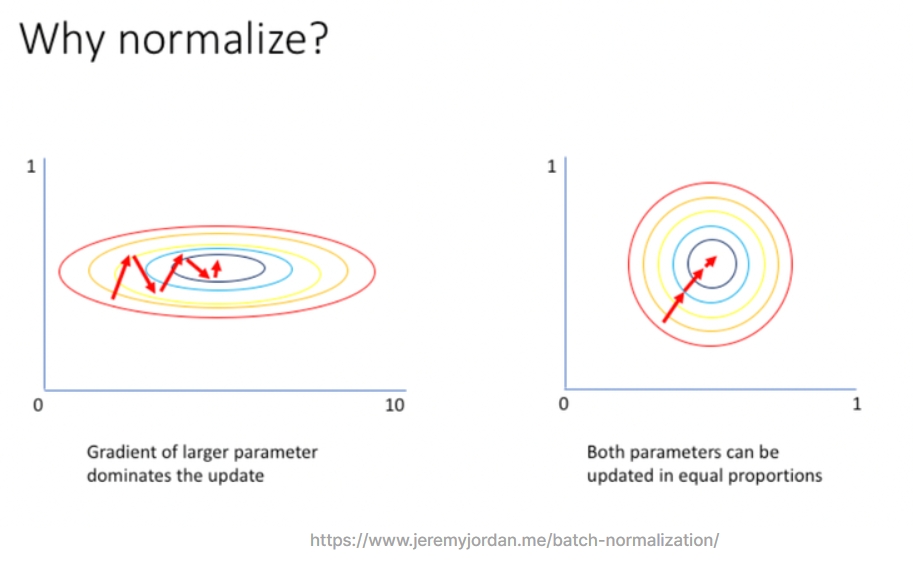

In [42]:
Image("[E-09] images/023.PNG") 
#출처: 8.가중치 초기화와 배치 정규화_8-3 배치 정규화

### Step 5. 모델 학습 및 시각화

In [46]:
# 노드 요청사항

# ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행

In [49]:
# LMS 9.딥러닝 모델실습_9-3.모델최적화 참조
check_point_cb = callbacks.ModelCheckpoint('great_reuters_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=40, batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/40
14/14 [==============================] - 2s 112ms/step - loss: 0.0804 - accuracy: 0.9633 - val_loss: 1.1905 - val_accuracy: 0.7614
Epoch 2/40
14/14 [==============================] - 1s 95ms/step - loss: 0.0689 - accuracy: 0.9653 - val_loss: 1.1658 - val_accuracy: 0.7823
Epoch 3/40
14/14 [==============================] - 1s 93ms/step - loss: 0.0674 - accuracy: 0.9659 - val_loss: 1.2183 - val_accuracy: 0.7671
Epoch 4/40
14/14 [==============================] - 1s 91ms/step - loss: 0.0687 - accuracy: 0.9660 - val_loss: 1.3350 - val_accuracy: 0.7738
Epoch 5/40
14/14 [==============================] - 1s 91ms/step - loss: 0.0627 - accuracy: 0.9650 - val_loss: 1.2012 - val_accuracy: 0.7988
Epoch 6/40
14/14 [==============================] - 1s 91ms/step - loss: 0.0623 - accuracy: 0.9657 - val_loss: 1.2548 - val_accuracy: 0.7894
Epoch 7/40
14/14 [==============================] - 1s 92ms/step - loss: 0.0605 - accuracy: 0.9678 - val_loss: 1.4959 - val_accuracy: 0.7676
Epoch 8/40
1

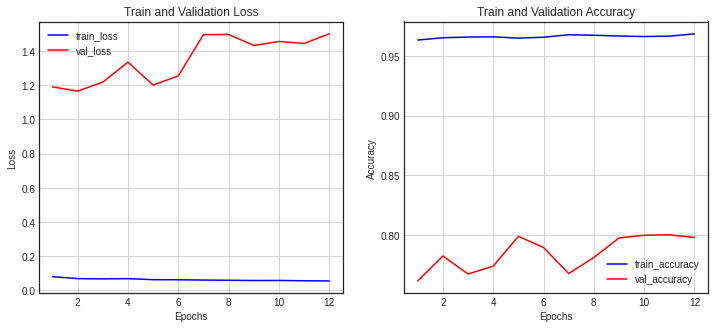

In [50]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### <span style = "color:red;">음.. 왜 이렇게 나올까, 노드 영상에서 나온 차트와 비교해보자</span> 

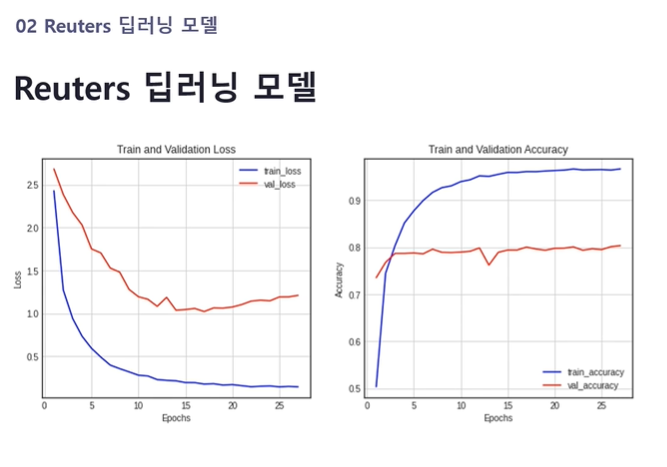

In [51]:
Image("[E-09] images/024.PNG")

### <span style = "color:orange;">엄청 다른데.. 어떻게 수정하면 좋을까?</span> 

1. train_loss가 일정한걸로 봐서는, 뭔가 반영이 안된 것 같다. 변수 설정이 잘못되었나?
2. 참고했던 8-3노드에서는 배치정규화를 하지 않은 상태에서 fit()안에 배치사이즈를 512로 주었다.   
배치사이즈를 빼고 다시 해보면?

In [52]:
history = model.fit(x_train, y_train, epochs=40, 
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/40
211/211 [==============================] - 9s 45ms/step - loss: 0.1369 - accuracy: 0.9581 - val_loss: 1.5762 - val_accuracy: 0.7823
Epoch 2/40
211/211 [==============================] - 9s 43ms/step - loss: 0.1537 - accuracy: 0.9578 - val_loss: 1.4884 - val_accuracy: 0.7867
Epoch 3/40
211/211 [==============================] - 9s 44ms/step - loss: 0.1714 - accuracy: 0.9569 - val_loss: 1.5795 - val_accuracy: 0.7947
Epoch 4/40
211/211 [==============================] - 9s 44ms/step - loss: 0.1555 - accuracy: 0.9568 - val_loss: 1.5723 - val_accuracy: 0.7943
Epoch 5/40
211/211 [==============================] - 9s 43ms/step - loss: 0.1554 - accuracy: 0.9598 - val_loss: 1.7380 - val_accuracy: 0.7898
Epoch 6/40
211/211 [==============================] - 9s 44ms/step - loss: 0.1388 - accuracy: 0.9584 - val_loss: 1.7847 - val_accuracy: 0.7925
Epoch 7/40
211/211 [==============================] - 9s 44ms/step - loss: 0.1422 - accuracy: 0.9595 - val_loss: 1.6383 - val_accuracy: 0.8059

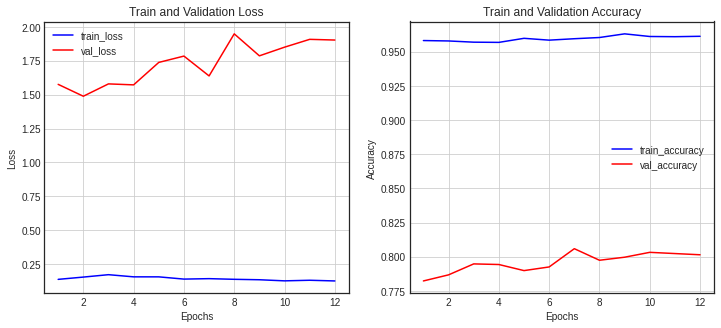

In [53]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### <span style = "color:orange;">fit()에서 배치사이즈를 빼보고 했는데</span> 

3. train_loss는 여전히 큰 변화가 없다.
4. val_loss와 val_accuracy는 처음의 그래프와 비교했을 때 조금 차이점이 있다.

### Step 6. 모델 평가 및 예측

테스트 데이터셋을 이용해 모델을 평가

In [54]:
model.evaluate(x_test, y_test) 

71/71 [==============================] - 0s 5ms/step - loss: 1.6622 - accuracy: 0.7618


[1.6622111797332764, 0.7617987394332886]

### <span style = "color:red;">해석</span> 

x_test, y_test에 대해

**loss값은 1.6622**      
**accuracy는 0.7618**

이 나왔다.

# 5. 결론

1. 로이터 데이터셋으로 배치정규화, 드롭아웃이 적용된 분류 모델을 Sequential API 방법으로 만들어보았다.
2. loss() 값은 1.6622, Accuracy는 0.7618이 나왔다.
3. Accuracy는 높아야 좋은 것 같은데.. 많이 낮게 나온 것 같다.
4. 모델 예측에서 predict()을 통해 예측을 해야하는데, 어떻게 코드를 적용시켜야 할지 어렵다.
5. 노드 영상에서의 train_loss, val_loss / train_accuracy, val_accuracy에 대한 그래프가 내가 해 본 것과 차이가 많이 난다.    
어떻게 수정하면 좋을지 더 공부가 필요하다.

# 6. 탐구 및 시도 모음

### <span style = "color:orange;">질문! loss=categorical_crossentropy?</span> 

케라스에서 제공하는 손실함수 종류 중 하나    
Multi-class classification, 클래스가 여러 개인 다중 분류 문제에서 사용    
label이 원핫인코딩된 형태, **즉 label이 class를 나타내는 one-hot vector를 값으로 가질 때 사용**

[출처: https://cheris8.github.io/artificial%20intelligence/DL-Keras-Loss-Function/]

### <span style = "color:orange;">질문! Optimizer=rmsprop이 뭘까?</span>
[출처: https://onevision.tistory.com/entry/Optimizer-%EC%9D%98-%EC%A2%85%EB%A5%98%EC%99%80-%ED%8A%B9%EC%84%B1-Momentum-RMSProp-Adam]

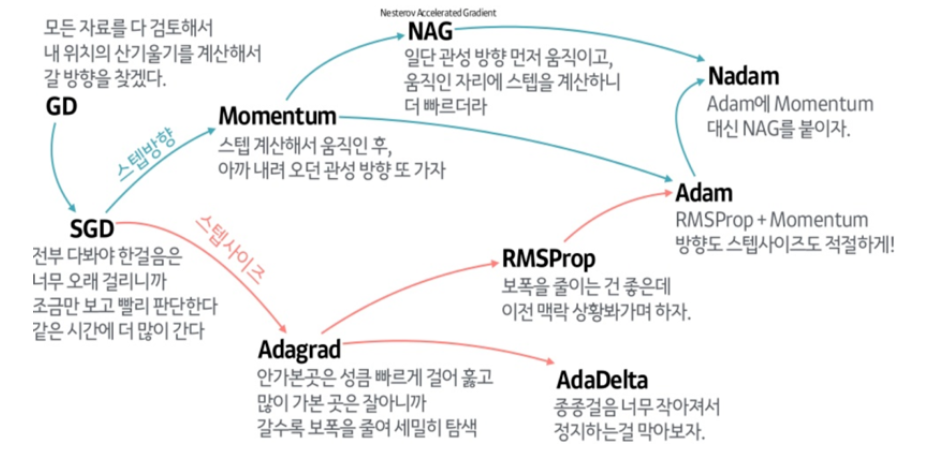

In [55]:
Image("[E-09] images/025.PNG")

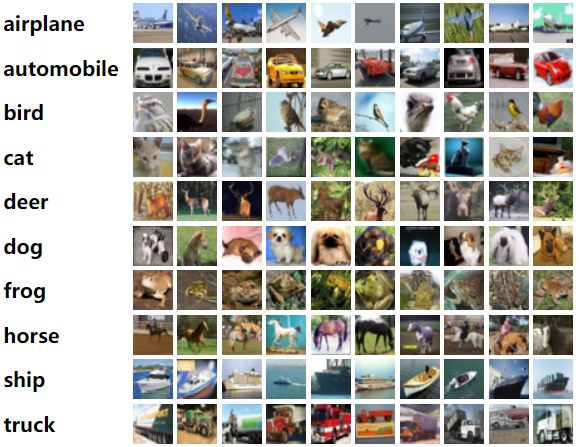

In [57]:
Image("[E-09] images/026.png")

# 7. CIFAR10 딥러닝 모델 
- Step 1. 라이브러리 및 데이터 불러오기
- Step 2. 데이터 나누기, 데이터 구조 파악     
- Step 3. 데이터 샘플 시각화, 형태 변형    
- Step 4. 모델 구성 및 컴파일    
- Step 5. 모델 학습 및 시각화   
- Step 6. 모델 평가 및 예측

CIFAR10 데이터셋은 32x32 픽셀의 6,000개 컬러 이미지로 이루어져 있다.     
데이터셋의 각 이미지는 10개의 클래스로 라벨링 되어 있다.

### Step 1. 라이브러리 및 데이터 불러오기

In [58]:
# 노드 요청 사항

# CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리
# 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용
# 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력

In [70]:
import matplotlib.pyplot as plt

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [71]:
# cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리
from keras.datasets import cifar10

In [72]:
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

In [73]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


### Step 2. 데이터 나누기, 데이터 구조 파악

In [74]:
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

In [75]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 1)
(10000, 1)


In [76]:
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력

print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


**print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))**

문제에는 x_train_full의 shape을 물어보는데.. 이미 데이터를 나눈 상태에서 어떻게 하면 구할 수 있는지 공부가 더 필요한 부분이다.

In [ ]:
# class_name 변수를 만들어 
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담기

In [77]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

### Step 3. 데이터 샘플 시각화, 형태 변형

In [ ]:
# 데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인

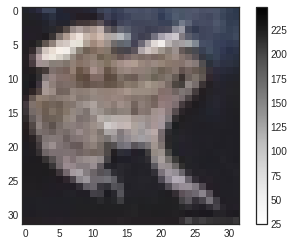

In [79]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [78]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


#### 데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해주기
#### 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형하기

In [85]:
x_train_3d = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], -1))

In [86]:
print(x_train_3d.shape)

(40000, 32, 96)


In [88]:
x_val_3d = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], -1))
x_test_3d = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], -1))

In [89]:
print(x_val_3d.shape)
print(x_test_3d.shape)

(10000, 32, 96)
(10000, 32, 96)


#### 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환

In [98]:
x_train_3d = x_train / 255.
x_val_3d = x_val / 255.
x_test_3d = x_test / 255.

In [100]:
print(x_train_3d[0])

[[[0.00052288 0.00055363 0.00066128]
  [0.00056901 0.00056901 0.00078431]
  [0.00067666 0.00067666 0.00098424]
  ...
  [0.00095348 0.00112265 0.00143022]
  [0.00079969 0.00096886 0.00127643]
  [0.00069204 0.00087659 0.00118416]]

 [[0.00053825 0.00053825 0.00056901]
  [0.00052288 0.00052288 0.00061515]
  [0.00052288 0.0005075  0.00066128]
  ...
  [0.00089196 0.00106113 0.0013687 ]
  [0.00076894 0.00092272 0.0012303 ]
  [0.0007228  0.00089196 0.00119954]]

 [[0.00052288 0.0005075  0.00053825]
  [0.0005075  0.00049212 0.00055363]
  [0.0005075  0.00049212 0.00058439]
  ...
  [0.00101499 0.00118416 0.00149173]
  [0.00078431 0.00095348 0.00126105]
  [0.00081507 0.00098424 0.00129181]]

 ...

 [[0.00049212 0.00049212 0.00058439]
  [0.00049212 0.00047674 0.00056901]
  [0.0005075  0.0005075  0.00058439]
  ...
  [0.00063053 0.00058439 0.00069204]
  [0.00052288 0.00047674 0.00058439]
  [0.00055363 0.00049212 0.00061515]]

 [[0.0005075  0.00047674 0.00055363]
  [0.00049212 0.00046136 0.00055363]


In [104]:
x_train_3d.shape

(40000, 32, 32, 3)

### Step 4. 모델 구성

In [ ]:
# BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성

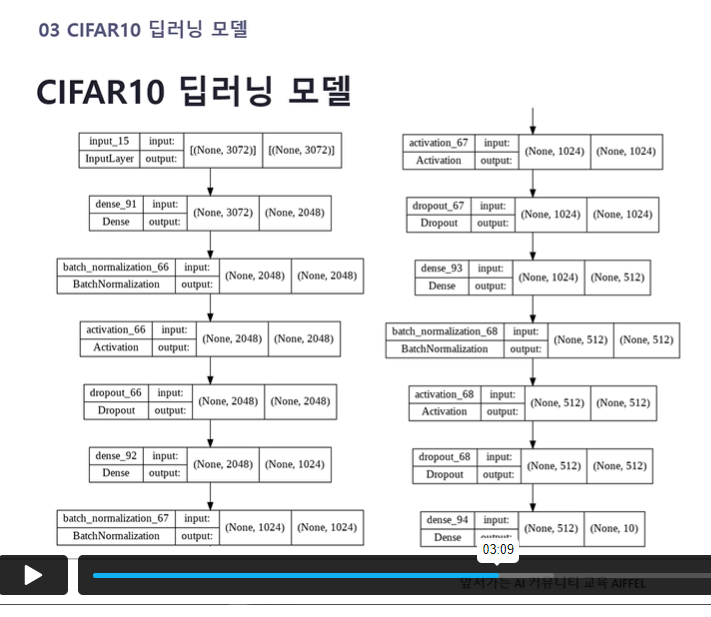

In [93]:
Image("[E-09] images/027.PNG")

### 1. 모델 구성

In [101]:
model = models.Sequential()
model.add(layers.Input(shape=(3072, ))) 
model.add(layers.Dense(3072, name='hidden_1')) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('sigmoid'))
model.add(layers.Dropout(0.2)) # 7-4 노드에서 20%로 드롭아웃을 주어서 여기에서도 그렇게 적용해 봄
model.add(layers.Dense(2048, name='hidden_2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('sigmoid'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024, name='hidden_3'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('sigmoid'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='softmax', name='output'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 3072)              9440256   
_________________________________________________________________
batch_normalization_5 (Batch (None, 3072)              12288     
_________________________________________________________________
activation_5 (Activation)    (None, 3072)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 3072)              0         
_________________________________________________________________
hidden_2 (Dense)             (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_6 (Batch (None, 2048)              8192      
_________________________________________________________________
activation_6 (Activation)    (None, 2048)             

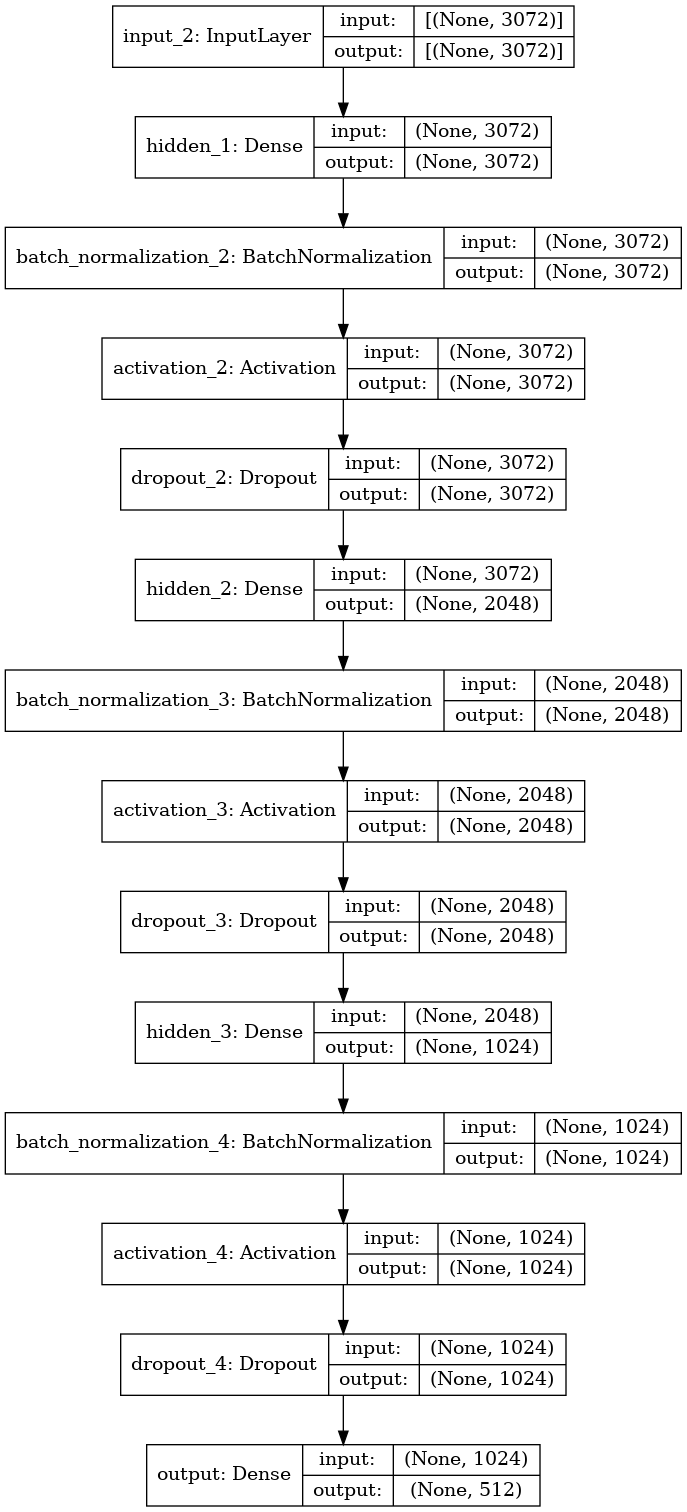

In [95]:
#어떤 모델이 생성되었는지 그림으로 확인
utils.plot_model(model, show_shapes=True)

### 2. 모델 컴파일

In [102]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Step 5. 모델 학습 및 시각화 

ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행

In [105]:
# LMS 9.딥러닝 모델실습_9-3.모델최적화 참조
check_point_cb = callbacks.ModelCheckpoint('great_cifa10_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train_3d, y_train, epochs=40, 
                    validation_data=(x_val_3d, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/40


ValueError: in user code:

    /opt/conda/lib/python3.9/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.9/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.9/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.9/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /opt/conda/lib/python3.9/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/conda/lib/python3.9/site-packages/keras/engine/input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 3072 but received input with shape (32, 32, 32, 3)


In [ ]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# plt.style.use('seaborn-white')

# history_dict = history.history

# loss = history_dict['loss']
# val_loss = history_dict['val_loss']

# epochs = range(1, len(loss) + 1)
# fig = plt.figure(figsize=(12, 5))

# ax1 = fig.add_subplot(1, 2, 1)
# ax1.plot(epochs, loss, 'b-', label='train_loss')
# ax1.plot(epochs, val_loss, 'r-', label='val_loss')
# ax1.set_title('Train and Validation Loss')
# ax1.set_xlabel('Epochs')
# ax1.set_ylabel('Loss')
# ax1.grid()
# ax1.legend()

# accuracy = history_dict['accuracy']
# val_accuracy = history_dict['val_accuracy']

# ax2 = fig.add_subplot(1, 2, 2)
# ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
# ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
# ax2.set_title('Train and Validation Accuracy')
# ax2.set_xlabel('Epochs')
# ax2.set_ylabel('Accuracy')
# ax2.grid()
# ax2.legend()

# plt.show()

### Step 6. 모델 평가 및 예측

In [ ]:
# model.evaluate(x_test, y_test) 

# 8. 결론

1. CIFAR10의 데이터를 가지고 앞의 2개의 프로젝트보다 더 복잡한 모델을 만들어보았다.
2. 하지만 모델을 학습시키는 과정에서 에러가 나서 그 부분을 해결해야한다.

# 9. 탐구 및 시도 모음

### <span style = "color:orange;">데이터의 형태를 바꾸는 부분에서 fashion MNIST와 ChatGPT의 도움을 받아 두 가지 방법으로 시도해 봄</span>

In [82]:
# Fashion MNIST 노드 참조
x_train_reshape = x_train.reshape(-1, 32 * 32 * 3)
# x_val = x_val.reshape(-1, 28 * 28)
# x_test = x_test.reshape(-1, 28 * 28)

In [80]:
# ChatGPT 참조
x_train_flat = np.reshape(x_train, (x_train.shape[0], -1))
print(x_train_flat.shape)

(40000, 3072)


In [81]:
print(x_train.shape)

(40000, 32, 32, 3)


In [84]:
print(x_train_reshape.shape)

(40000, 3072)


# 10. 회고

### 1. 프로젝트에서 어려웠던 점, 해결을 위해 시도한 방법, 문제해결에 성공한 이유 또는 실패한 이유

- **프로젝트에서 어려웠던 점**  
    1. 딥러닝 모델을 구축하는 전체과정 내가 하나씩 만들어 나가보기
    2. CIFAR10에서 4차원 배열의 데이터의 형태를 바꾸는 것


- **해결을 위해 시도한 방법**  
    1. 딥러닝 노드를 많이 복습했습니다.     
    2. 이상하다고 생각하는 부분은 시간을 들여 공부했습니다.     
    3. ChatGPT와 다른 블로그 들을 많이 찾아봤습니다.    


- **문제해결에 성공한 이유 또는 실패한 이유**  
    시간은 많이 걸렸지만 하나씩 찾아보다보니 시간이 많이 걸리는 부분도 있었지만, 수월하게 지나가는 부분들도 있었습니다.

### 2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점

- **프로젝트를 진행하면서 알아낸 점**

이번에는 '탐구 및 시도 모음'을 따로 모아봤습니다.     
그 부분들에서 다룬 것들이 이번 프로젝트를 진행하면서 알아낸 점이라 할 수 있습니다.

- **아직 모호한 점**

- dense 레이어를 몇 개를 쌓을지는 내 마음인가? 
- 활성화 함수와 loss 손실함수의 차이 알기
- 로이터 프로젝트에서 결과 시각화했을 때 강의 내용과 다른 부분...어떻게 수정하면 좋을까?
- CIFAR10 모델 수정하기

### 3. 자기 다짐, 프로젝트를 진행하면서 느낀 점

1. CIFAR10 모델까지 완성하고 제출하고 싶었는데 제출 시간 내에 수정하지 못해 아쉽습니다.
2. 이번에는 이미지를 넣는 방법을 익혀서 많이 넣었습니다. 뿌듯해요!
3. 지난번 프로젝트를 2개 제출하지 못했는데, 이번에는 제 힘으로 시간을 들여 공부한 프로젝트를 제출할 수 있어 기뻐요. 

# 11. References

**Boston Housing Project**

<span style = "color:gray;">np.mean() (axis=0)</span>     
https://blog.naver.com/pmw9440/223028166828
    
<span style = "color:gray;">아이펠 프로젝트 노드_주피터 이미지 업로드 링크</span>      
https://0ver-grow.tistory.com/876

<span style = "color:gray;">레이어 유닛수 가중치 관련</span> 
https://jjeongil.tistory.com/974
    
<span style = "color:gray;">유닛수 관련</span>     
https://blog.naver.com/hy0_na/223015165069
    
<span style = "color:gray;">mae</span>     
https://blog.naver.com/harim7898/223065762099
    
<span style = "color:gray;">LMS 머신러닝 기초 with 파이썬_4.사이킷런 살펴보기</span> 
<span style = "color:gray;">LMS 딥러닝 한 번에 끝내기</span> 

<span style = "color:gray;">케라스 활성화함수 종류</span> 
https://keras.io/api/layers/activations/    
    
    
**Reuters Project**

<span style = "color:gray;">원핫인코딩 to_categorical 함수</span> 
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=ksg97031&logNo=221302568652
    
<span style = "color:gray;">optimizer rmsprop</span> 
    https://onevision.tistory.com/entry/Optimizer-%EC%9D%98-%EC%A2%85%EB%A5%98%EC%99%80-%ED%8A%B9%EC%84%B1-Momentum-RMSProp-Adam

<span style = "color:gray;">크로스엔트로피 손실함수</span> 
https://cheris8.github.io/artificial%20intelligence/DL-Keras-Loss-Function/


**CIFAR10 Project**

<span style = "color:gray;">CIFAR10 데이터셋 다운로드</span> 
https://gruuuuu.github.io/machine-learning/cifar10-cnn/